# Problem 3
Euler family

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def exact_solution(time):
    uExact=exp(cos(2*pi*time)-.25*time-1)
    vExact=-(2*pi*sin(2*pi*time))*exp(cos(2*pi*time)-.25*time-1)
    return uExact,vExact

Text(0.5,1,'Exact Solution')

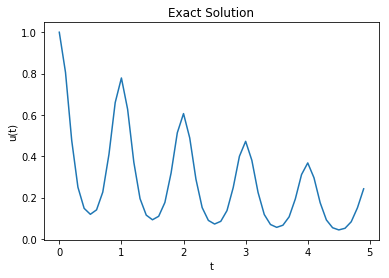

In [3]:
h=.1
tInitial,tFinal=0,5
tExact=arange(tInitial,tFinal,h)
uExact=zeros((len(tExact),1))
vExact=zeros((len(tExact),1))
for i in range (len(tExact)):
    uExact[i],vExact[i]=exact_solution(tExact[i])
plot(tExact,uExact)
xlabel('t')
ylabel('u(t)')
title("Exact Solution")

In [4]:
def func(t):
    c=(0.25 + 2*pi*sin(2*pi*t))
    return c

In [5]:
def my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros(nSteps)
    v=zeros(nSteps)
    u[0]=uo
    v[0]=-.25
    for i in range(nSteps-1):
        v[i+1] = -func(time[i+1]) * (u[i] + deltaT * (1 - gamma) * v[i]) /(1 + gamma * deltaT*func(time[i+1]))
        u[i+1] = u[i] + deltaT * ( (1 - gamma) * v[i] + gamma * v[i+1] )
    return time,u,v


In [6]:
uo=1
tInitial,tFinal=0,5
deltaT=[.1,.01,.001]
# Backward Euler
gamma=1
tB1,uB1,vF1=my_ODE_solver(uo,tInitial,tFinal,deltaT[0],gamma)
tB2,uB2,vF2=my_ODE_solver(uo,tInitial,tFinal,deltaT[1],gamma)
tB3,uB3,vF3=my_ODE_solver(uo,tInitial,tFinal,deltaT[2],gamma)
#Forward Euler
gamma_F=0
tF1,uF1,vF1=my_ODE_solver(uo,tInitial,tFinal,deltaT[0],gamma_F)
tF2,uF2,vF2=my_ODE_solver(uo,tInitial,tFinal,deltaT[1],gamma_F)
tF3,uF3,vF3=my_ODE_solver(uo,tInitial,tFinal,deltaT[2],gamma_F)


Text(0.5,1,'Time Step=.1')

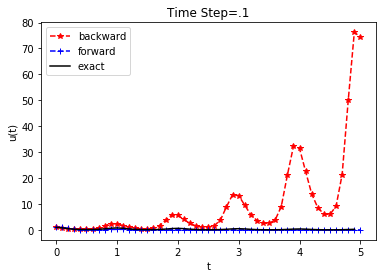

In [7]:
plot(tB1,uB1,'r*--')
plot(tF1,uF1,'b+--')
plot(tExact,uExact,'k')
xlabel('t')
ylabel('u(t)')
legend(["backward","forward","exact"])
title("Time Step=.1")

Text(0.5,1,'Time Step=.01')

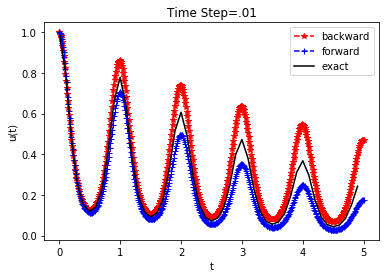

In [8]:
plot(tB2,uB2,'r*--')
plot(tF2,uF2,'b+--')
plot(tExact,uExact,'k')
xlabel('t')
ylabel('u(t)')
legend(["backward","forward","exact"])
title("Time Step=.01")

Text(0.5,1,'Time Step=.001')

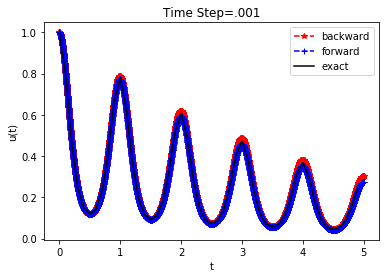

In [9]:
plot(tB3,uB3,'r*--')
plot(tF3,uF3,'b+--')
plot(tExact,uExact,'k')
xlabel('t')
ylabel('u(t)')
legend(["backward","forward","exact"])
title("Time Step=.001")

# Problem 4
Forward and backward euler

In [10]:
def exact_solution(t):
    uExact=[2*cos(t),2*sin(t)]
    vExact=[-2*sin(t),2*cos(t)]
    return uExact,vExact

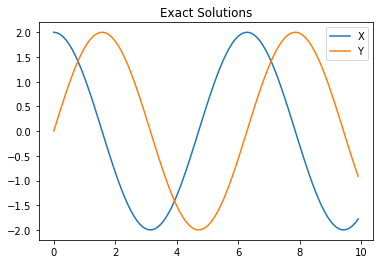

In [11]:
h=.1
tInitial,tFinal=0,10
tExact=arange(tInitial,tFinal,h)
uExact=zeros((len(tExact),2))
vExact=zeros((len(tExact),2))
xExact=zeros(len(tExact))
yExact=zeros(len(tExact))
for i in range (len(tExact)):
    uExact[i],vExact[i]=exact_solution(tExact[i])
    xExact[i]=uExact[i,0]
    yExact[i]=uExact[i,1]
plot(tExact,xExact)
plot(tExact,yExact)
title("Exact Solutions")
legend(["X","Y"])

# Backward Euler

In [12]:
def my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros((nSteps,2))
    v=zeros((nSteps,2))
    u[0]=uo
    v[0]=[0,2]
    for i in range(nSteps-1):
        v[i+1,0] = (-u[i,1]-deltaT*(1-gamma)*v[i,1]-deltaT*gamma*u[i,0]
                    -(deltaT**2)*gamma*(1-gamma)*v[i,0])
        v[i+1,1]=(-deltaT*gamma*u[i,1]-(deltaT**2)*gamma*(1-gamma)*v[i,1]
                  +u[i,0]+deltaT*(1-gamma)*v[i,0])
        u[i+1,0] =u[i,0]+deltaT*(1-gamma)*v[i,0]+gamma*v[i+1,0]
        u[i+1,1]=u[i,1]+deltaT*(1-gamma)*v[i,1]+gamma*v[i+1,1]
    return time,u,v


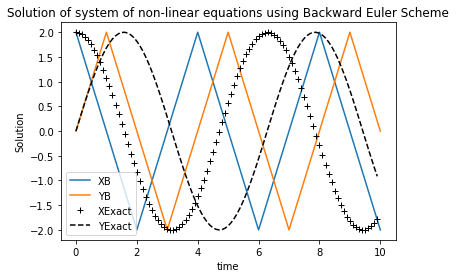

In [13]:
uo=[2,0]
tInitial,tFinal=0,10
deltaT1=[1,.1]
gamma=1
tB1,uB1,vF1=my_ODE_solver(uo,tInitial,tFinal,deltaT1[0],gamma)
timeB1=arange(tInitial,tFinal+deltaT1[0],deltaT1[0])
nStepsB1=len(timeB1)
xB1=zeros(nStepsB1)
yB1=zeros(nStepsB1)
for i in range(nStepsB1):
    xB1[i]=uB1[i,0]
    yB1[i]=uB1[i,1]
plot(tB1,xB1)
plot(tB1,yB1)
plot(tExact,xExact,'k+')
plot(tExact,yExact,'k--')
xlabel('time')
ylabel('Solution')
title("Solution of system of non-linear equations using Backward Euler Scheme")
legend(["XB","YB","XExact","YExact"])


Text(0,0.5,'X^2+Y^2')

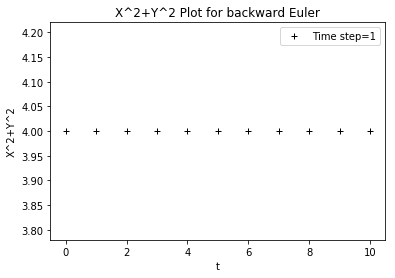

In [14]:
tB2,uB2,vF2=my_ODE_solver(uo,tInitial,tFinal,deltaT1[1],gamma)
timeB2=arange(tInitial,tFinal+deltaT1[1],deltaT1[1])
nStepsB2=len(timeB2)
xB2=zeros(nStepsB2)
yB2=zeros(nStepsB2)
for i in range(nStepsB2):
    xB2[i]=uB2[i,0]
    yB2[i]=uB2[i,1]
ZB1=xB1**2+yB1**2
ZB2=xB2**2+yB2**2
plot(timeB1,ZB1,'k+')
title("X^2+Y^2 Plot for backward Euler")
legend(["Time step=1"])
xlabel('t')
ylabel('X^2+Y^2')

Text(0,0.5,'X^2+Y^2')

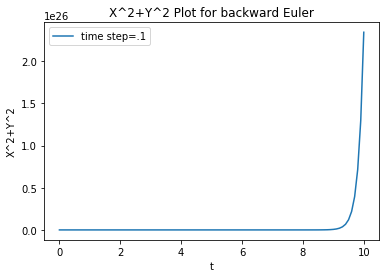

In [15]:
plot(timeB2,ZB2)
title("X^2+Y^2 Plot for backward Euler")
legend(["time step=.1"])
xlabel('t')
ylabel('X^2+Y^2')

Comments:
    1. At time step=1, x^2 + y^2 = 4, which is as expected
    2. at time step=.1, the solution diverges

# Forward Euler

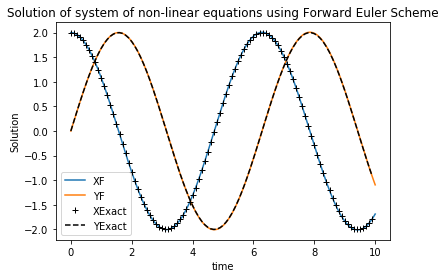

In [16]:
gamma_F=0
deltaT2=[1,.1,.001]
tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT2[2],gamma_F)
time=arange(tInitial,tFinal+deltaT2[2],deltaT2[2])
nSteps=len(time)
xF=zeros(nSteps)
yF=zeros(nSteps)
for i in range(nSteps):
    xF[i]=uF[i,0]
    yF[i]=uF[i,1]
plot(tF,xF)
plot(tF,yF)
plot(tExact,xExact,'k+')
plot(tExact,yExact,'k--')
xlabel('time')
ylabel('Solution')
title("Solution of system of non-linear equations using Forward Euler Scheme")
legend(["XF","YF","XExact","YExact"])


Text(0,0.5,'X^2+Y^2')

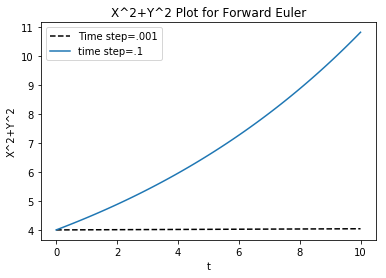

In [17]:
ZF=xF**2+yF**2
plot(tF,ZF,'k--')
tF1,uF1,vF1=my_ODE_solver(uo,tInitial,tFinal,deltaT2[0],gamma_F)
time1=arange(tInitial,tFinal+deltaT2[0],deltaT2[0])
nSteps1=len(time1)
xF1=zeros(nSteps1)
yF1=zeros(nSteps1)
for i in range(nSteps1):
    xF1[i]=uF1[i,0]
    yF1[i]=uF1[i,1]
ZF1=xF1**2+yF1**2

tF2,uF2,vF2=my_ODE_solver(uo,tInitial,tFinal,deltaT2[1],gamma_F)
time2=arange(tInitial,tFinal+deltaT2[1],deltaT2[1])
nSteps2=len(time2)
xF2=zeros(nSteps2)
yF2=zeros(nSteps2)
for i in range(nSteps2):
    xF2[i]=uF2[i,0]
    yF2[i]=uF2[i,1]
ZF2=xF2**2+yF2**2
plot(tF2,ZF2)
title("X^2+Y^2 Plot for Forward Euler")
legend(["Time step=.001","time step=.1"])
xlabel('t')
ylabel('X^2+Y^2')


Text(0,0.5,'X^2+Y^2')

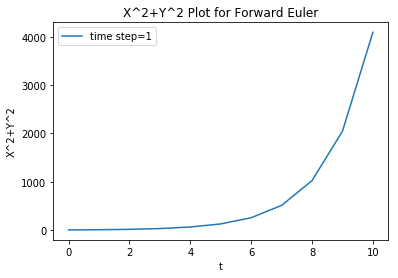

In [18]:
plot(tF1,ZF1)
title("X^2+Y^2 Plot for Forward Euler")
legend(["time step=1"])
xlabel('t')
ylabel('X^2+Y^2')


comments:
    1. at time step=1, the solution diverges
    2. at time step=.1, x^2 + y^2 increases with time, that means it is diverging
    3.At time step=.001, x^2 + y^2 = 4, which is as expected

# problem 5(d)

In [19]:
def exact_solution(t):
    xExact=2*cos(t)
    vExact=-2*sin(t)
    aExact=-2*cos(t)
    yExact=2*sin(t)
    return xExact,vExact,aExact,yExact

Text(0,0.5,'u(t)')

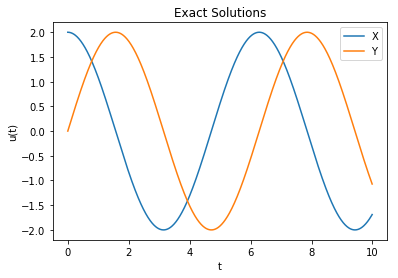

In [20]:
h=.01
tInitial,tFinal=0,10
tExact=arange(tInitial,tFinal,h)
xExact=zeros(len(tExact))
vExact=zeros(len(tExact))
aExact=zeros(len(tExact))
yExact=zeros(len(tExact))
for i in range (len(tExact)):
    xExact[i],vExact[i],aExact[i],yExact[i]=exact_solution(tExact[i])
    
plot(tExact,xExact)
plot(tExact,yExact)
title("Exact Solutions")
legend(["X","Y"])
xlabel('t')
ylabel('u(t)')

In [21]:
def my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT,gamma,betta):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros(nSteps)
    v=zeros(nSteps)
    a=zeros(nSteps)
    u[0]=uo
    v[0]=vo
    a[0]=ao
    for i in range(nSteps-1):
        u[i+1] = (u[i]+deltaT*v[i]+.5*(deltaT**2)*(1-2*betta)*a[i])/(1
                    +(deltaT**2)*betta)
        a[i+1]=-u[i+1]
        v[i+1] =v[i]+deltaT*((1-gamma)*a[i]+gamma*a[i+1])
    return time,u,a,v


Text(0,0.5,'X^2+Y^2')

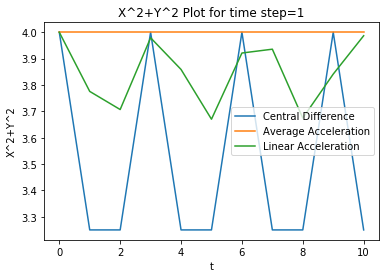

In [22]:
uo=2
vo=0
ao=-2
tInitial,tFinal=0,10
deltaT=[1,.1,.01]
time1=arange(tInitial,tFinal+deltaT[0],deltaT[0])
time2=arange(tInitial,tFinal+deltaT[1],deltaT[1])
time3=arange(tInitial,tFinal+deltaT[2],deltaT[2])
nSteps1=len(time1)
nSteps2=len(time2)
nSteps3=len(time3)
betta=0
gamma=.5
yo=0
tCD1,uCD1,aCD1,vCD1=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[0],gamma,betta)
zCD1=zeros(nSteps1)
yCD1=-vCD1
for i in range(nSteps1):
    zCD1[i]=uCD1[i]**2+yCD1[i]**2
plot(tCD1,zCD1)
betta=.25
gamma=.5
tAA1,uAA1,aAA1,vAA1=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[0],gamma,betta)
zAA1=zeros(nSteps1)
yAA1=-vAA1
for i in range(nSteps1):
    zAA1[i]=uAA1[i]**2+yAA1[i]**2
plot(tAA1,zAA1)
betta=(1/6)
gamma=.5
tLA1,uLA1,aLA1,vLA1=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[0],gamma,betta)
zLA1=zeros(nSteps1)
yLA1=-vLA1
for i in range(nSteps1):
    zLA1[i]=uLA1[i]**2+yLA1[i]**2
plot(tLA1,zLA1)
title("X^2+Y^2 Plot for time step=1")
legend(["Central Difference","Average Acceleration","Linear Acceleration"])
xlabel('t')
ylabel('X^2+Y^2')

Text(0,0.5,'X^2+Y^2')

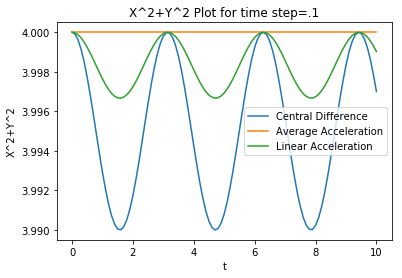

In [23]:
betta=0
gamma=.5
yo=0
tCD2,uCD2,aCD2,vCD2=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[1],gamma,betta)
zCD2=zeros(nSteps2)
yCD2=-vCD2
for i in range(nSteps2):
    zCD2[i]=uCD2[i]**2+yCD2[i]**2
plot(tCD2,zCD2)
betta=.25
gamma=.5
tAA2,uAA2,aAA2,vAA2=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[1],gamma,betta)
zAA2=zeros(nSteps2)
yAA2=-vAA2
for i in range(nSteps2):
    zAA2[i]=uAA2[i]**2+yAA2[i]**2
plot(tAA2,zAA2)
betta=(1/6)
gamma=.5
tLA2,uLA2,aLA2,vLA2=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[1],gamma,betta)
zLA2=zeros(nSteps2)
yLA2=-vLA2
for i in range(nSteps2):
    zLA2[i]=uLA2[i]**2+yLA2[i]**2
plot(tLA2,zLA2)
title("X^2+Y^2 Plot for time step=.1")
legend(["Central Difference","Average Acceleration","Linear Acceleration"])
xlabel('t')
ylabel('X^2+Y^2')

Text(0,0.5,'X^2+Y^2')

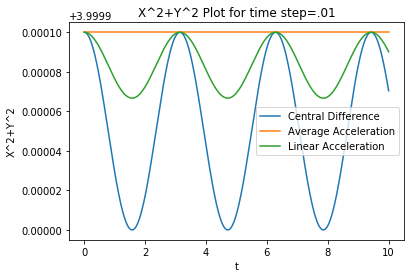

In [24]:
betta=0
gamma=.5
yo=0
tCD3,uCD3,aCD3,vCD3=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[2],gamma,betta)
zCD3=zeros(nSteps3)
yCD3=-vCD3
for i in range(nSteps3):
    zCD3[i]=uCD3[i]**2+yCD3[i]**2
plot(tCD3,zCD3)
betta=.25
gamma=.5
tAA3,uAA3,aAA3,vAA3=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[2],gamma,betta)
zAA3=zeros(nSteps3)
yAA3=-vAA3
for i in range(nSteps3):
    zAA3[i]=uAA3[i]**2+yAA3[i]**2
plot(tAA3,zAA3)
betta=(1/6)
gamma=.5
tLA3,uLA3,aLA3,vLA3=my_ODE_solver(uo,vo,ao,tInitial,tFinal,deltaT[2],gamma,betta)
zLA3=zeros(nSteps3)
yLA3=-vLA3
for i in range(nSteps3):
    zLA3[i]=uLA3[i]**2+yLA3[i]**2
plot(tLA3,zLA3)
title("X^2+Y^2 Plot for time step=.01")
legend(["Central Difference","Average Acceleration","Linear Acceleration"])
xlabel('t')
ylabel('X^2+Y^2')

Comments:
    1. for all time step, average acceleration has X^2 + Y^2 = 4
    2. for smaller time step, central difference and linear acceleration has X^2 + Y^2 close to 4. 

Text(0.5,1,'Newmark scheme for time step=.01')

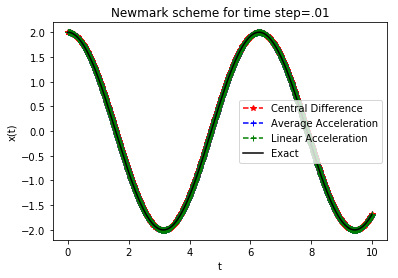

In [25]:
plot(tCD3,uCD3,'r*--')
plot(tAA3,uAA3,'b+--')
plot(tLA3,uLA3,'g+--')
plot(tExact,xExact,'k')
xlabel('t')
ylabel('x(t)')
legend(["Central Difference","Average Acceleration","Linear Acceleration","Exact"])
title("Newmark scheme for time step=.01")

# problem 5(b)
Forward Euler 

In [26]:
def my_ODE_solver(uo,tInitial,tFinal,deltaT):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros((nSteps,2))
    v=zeros((nSteps,2))
    u[0]=uo
    v[0]=[0,-1]
    for i in range(nSteps-1):
        u[i+1,0]=u[i,0]+deltaT*v[i,0]
        u[i+1,1]=u[i,1]+deltaT*v[i,1]
        v[i+1,0]=u[i+1,1]
        v[i+1,1]=(ita*(1-u[i+1,0]*u[i+1,0])*u[i+1,1]-k*u[i+1,0])/m
    return time,u,v


C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'solutions')

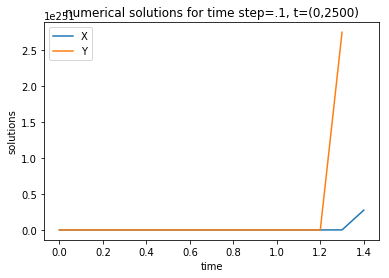

In [27]:
uo=[1,0]
m,ita,k=1,500,1
tInitial,tFinal=0,2500
deltaT=.1
tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT)
time=arange(tInitial,tFinal+deltaT,deltaT)
nSteps=len(time)
x=zeros(nSteps)
y=zeros(nSteps)
for i in range(nSteps):
    x[i]=uF[i,0]
    y[i]=uF[i,1]
plot(time,x)
plot(time,y)
title("numerical solutions for time step=.1, t=(0,2500)")
legend(["X","Y"])
xlabel("time")
ylabel("solutions")





Text(0,0.5,'solutions')

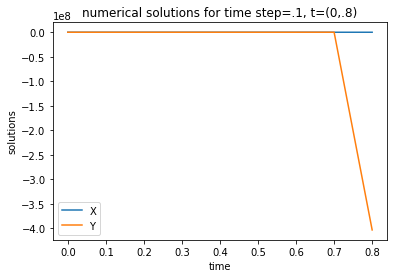

In [28]:
tInitial,tFinal=0,.8
deltaT=.1
tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT)
time=arange(tInitial,tFinal+deltaT,deltaT)
nSteps=len(time)
x=zeros(nSteps)
y=zeros(nSteps)
for i in range(nSteps):
    x[i]=uF[i,0]
    y[i]=uF[i,1]
plot(time,x)
plot(time,y)
title("numerical solutions for time step=.1, t=(0,.8)")
legend(["X","Y"])
xlabel("time")
ylabel("solutions")

# comments:
    Forward Euler diverges for longer period of time t=(0,2500)

# problem 6
backward euler

# problem 6(b)
forward euler

In [29]:
def my_ODE_solver_FE(uo,tInitial,tFinal,deltaT):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros((nSteps,2))
    v=zeros((nSteps,2))
    u[0]=uo
    v[0]=[0,2.5]
    for i in range(nSteps-1):
        u[i+1,0]=u[i,0]+deltaT*v[i,0]
        u[i+1,1]=u[i,1]+deltaT*v[i,1]
        v[i+1,0]=(sin(pi*time[i+1])-k1*(u[i+1,0])**3-k2*(u[i+1,0]-u[i+1,1])**3)/m1
        v[i+1,1]=(5*cos(2*pi*time[i+1])-k2*(u[i+1,1]-u[i+1,0])**3)/m2
    return time,u,v


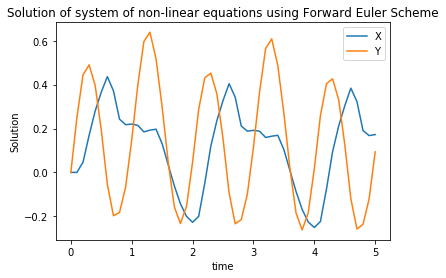

In [30]:
uo=[0,0]
m1,m2,k1,k2=1,2,5,10
tInitial,tFinal=0,5
deltaT=.1
tF,uF,vF=my_ODE_solver_FE(uo,tInitial,tFinal,deltaT)
time=arange(tInitial,tFinal+deltaT,deltaT)
nSteps=len(time)
xF=zeros(nSteps)
yF=zeros(nSteps)
for i in range(nSteps):
    xF[i]=uF[i,0]
    yF[i]=uF[i,1]
plot(tF,xF)
plot(tF,yF)
xlabel('time')
ylabel('Solution')
title("Solution of system of non-linear equations using Forward Euler Scheme")
legend(["X","Y"])


# problem 6(d)
backward euler

In [31]:
from scipy.optimize import fsolve
import math

def equations(p,*arg):
    gamma=1
    deltaT=.01
    ux,uy,time=arg
    [vx, vy] = p
    return (m1*vx+k1*(ux+deltaT*gamma*vx)**3+k2*(ux+deltaT*gamma*vx-uy-deltaT*gamma*vy)**3-sin(pi*time),m2*vy
            +k2*(uy+deltaT*gamma*vy-ux-deltaT*gamma*vx)**3-5*cos(2*pi*time))

In [32]:
def my_ODE_solver_BE(uo,tInitial,tFinal,deltaT):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros((nSteps,2))
    v=zeros((nSteps,2))
    u[0]=uo
    v[0]=[0,2.5]
    for i in range(nSteps-1):
        arg=(u[i,0],u[i,1],time[i+1])
        v[i+1,0],v[i+1,1]=fsolve(equations,(1,1),args=arg)
        u[i+1,0]=u[i,0]+deltaT*v[i+1,0]
        u[i+1,1]=u[i,1]+deltaT*v[i+1,1]
    return time,u,v


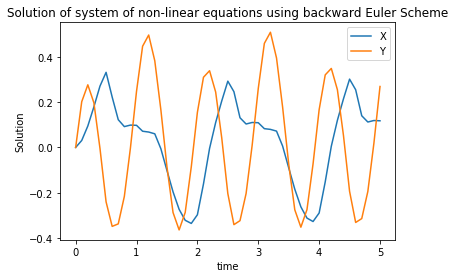

In [33]:
uo=[0,0]
m1,m2,k1,k2=1,2,5,10
tInitial,tFinal=0,5
deltaT=.1
tB,uB,vB=my_ODE_solver_BE(uo,tInitial,tFinal,deltaT)
time=arange(tInitial,tFinal+deltaT,deltaT)
nSteps=len(time)
xB=zeros(nSteps)
yB=zeros(nSteps)
for i in range(nSteps):
    xB[i]=uB[i,0]
    yB[i]=uB[i,1]
plot(tB,xB)
plot(tB,yB)
xlabel('time')
ylabel('Solution')
title("Solution of system of non-linear equations using backward Euler Scheme")
legend(["X","Y"])





Text(0.5,1,'comparison of forward euler and backward euler')

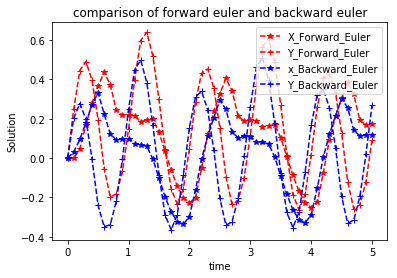

In [34]:
plot(tF,xF,'r*--')
plot(tF,yF,'r+--')
plot(tB,xB,'b*--')
plot(tB,yB,'b+--')
xlabel('time')
ylabel('Solution')
legend(["X_Forward_Euler","Y_Forward_Euler","x_Backward_Euler","Y_Backward_Euler"])
title("comparison of forward euler and backward euler")